In [1]:
Diamond Price Prediction
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [2]:
import pandas as pd

In [4]:
# data ingestion/reading data 
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.shape

(193573, 11)

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
### No missing values present in the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [14]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [18]:
## check for duplicated records
df.duplicated().sum()

0

In [15]:
df_sam=df.sample(200)

In [16]:
df_sam.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
108833,1.01,Very Good,F,SI2,62.7,58.0,6.35,6.39,3.99,3897
163861,1.52,Ideal,H,VVS2,62.2,57.0,7.36,7.31,4.57,12787
127916,1.01,Ideal,G,VVS1,62.3,57.0,6.37,6.39,3.98,8575
132569,1.11,Ideal,F,VVS2,61.5,56.0,6.63,6.67,4.09,8941
161999,0.43,Ideal,D,SI1,62.3,55.0,4.84,4.81,3.01,774


In [19]:
## segregate numerical and categorical columns

numerical_columns=df_sam.columns[df_sam.dtypes!='object']
categorical_columns=df_sam.columns[df_sam.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [20]:
df_sam[categorical_columns].describe()

,cut,color,clarity
count,200,200,200
unique,5,7,8
top,Ideal,E,SI1
freq,92,45,53


In [21]:
df_sam['cut'].value_counts()

Ideal        92
Premium      53
Very Good    41
Good         13
Fair          1
Name: cut, dtype: int64

In [22]:
df_sam['color'].value_counts()

E    45
G    39
F    31
D    29
H    27
I    23
J     6
Name: color, dtype: int64

In [23]:
df_sam['clarity'].value_counts()

SI1     53
VS2     48
SI2     29
VS1     28
VVS2    24
VVS1    14
IF       3
I1       1
Name: clarity, dtype: int64

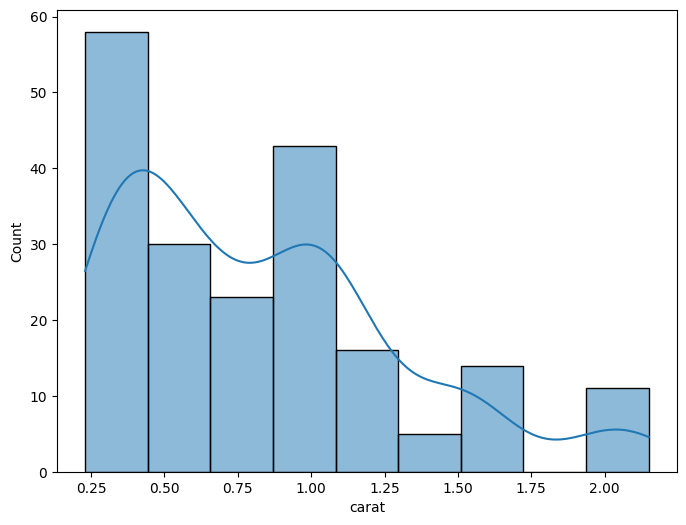

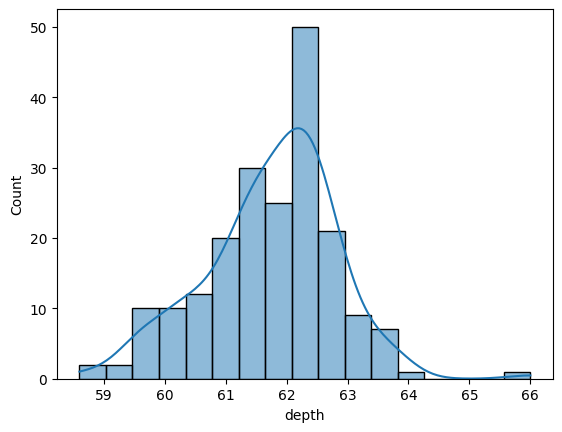

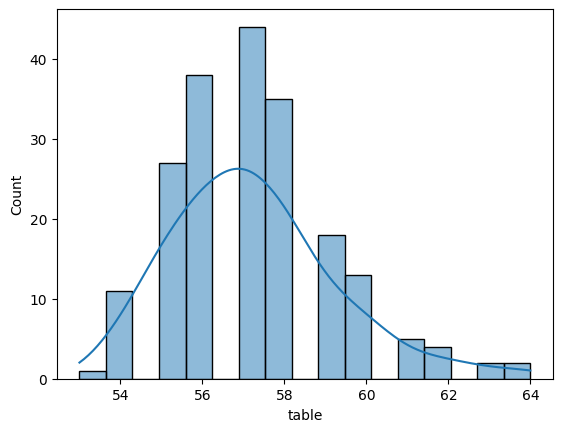

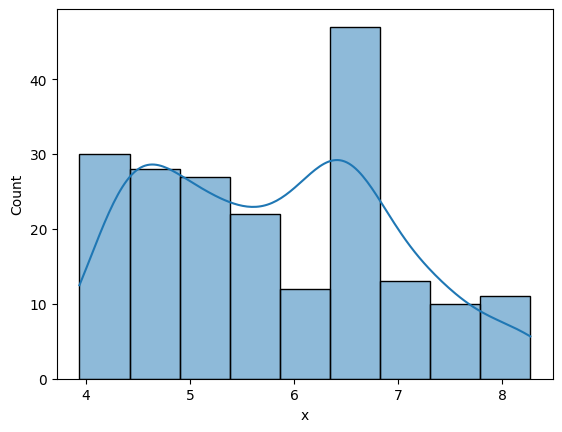

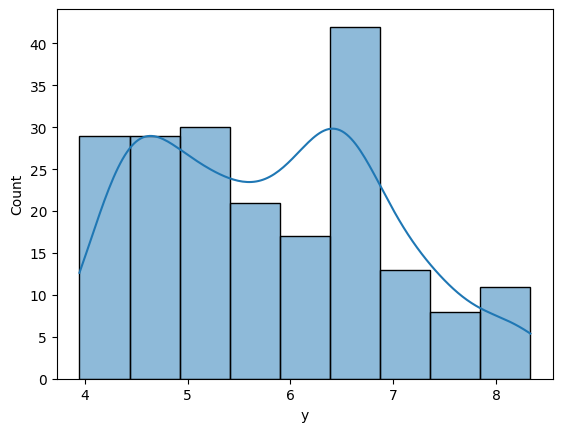

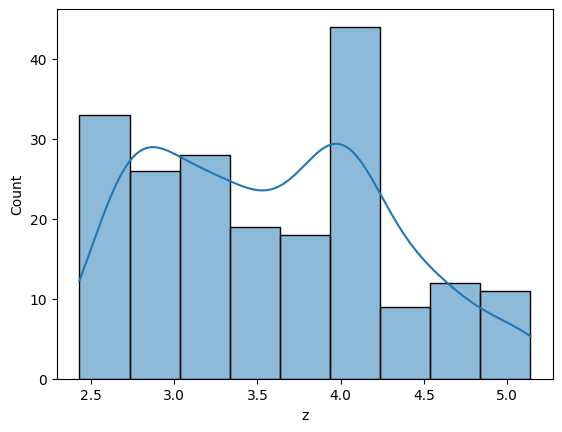

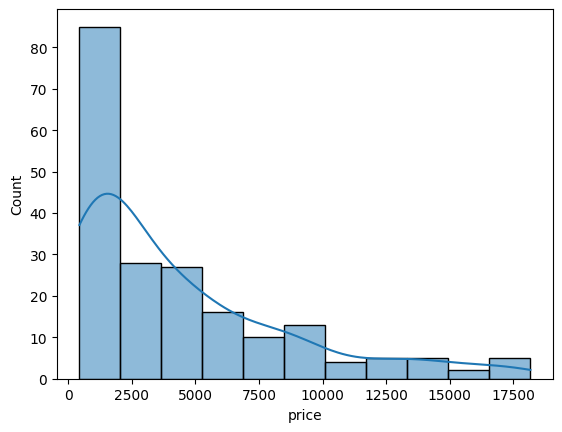

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df_sam,x=i,kde=True)
    print('\n')
    plt.show()

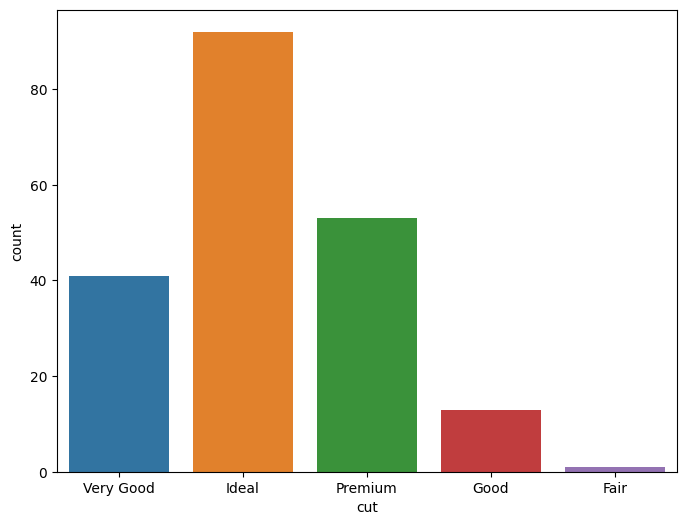

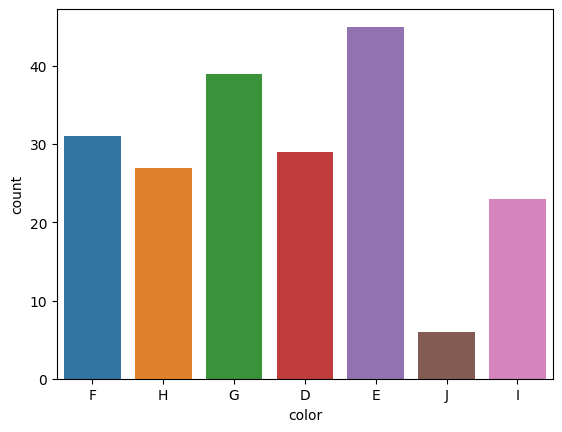

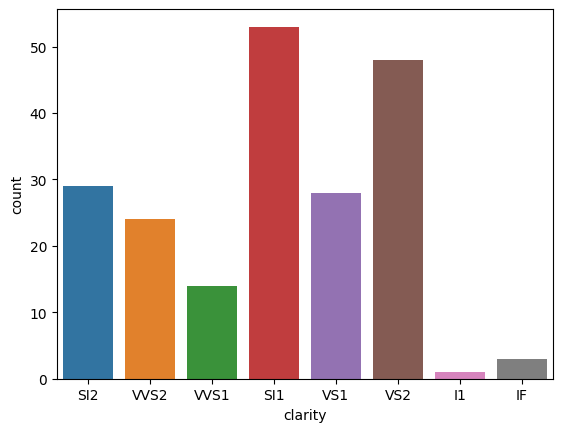

In [30]:
## Assignment Do the same for categorical data

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df_sam,x=i)
    print('\n')
    plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_6868\4114436217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sam.corr(),annot=True)


<Axes: >

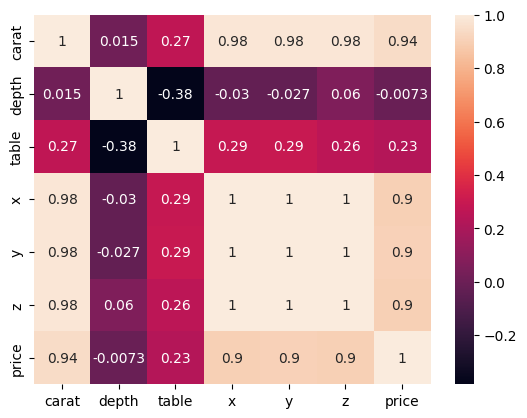

In [31]:
## correlation
sns.heatmap(df_sam.corr(),annot=True)

In [32]:
##Currently we will not execute this
## df_sam.drop(labels=['x','y','z'],axis=1)

In [33]:
df_sam['cut'].unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [34]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [35]:
df_sam['clarity'].unique()

array(['SI2', 'VVS2', 'VVS1', 'SI1', 'VS1', 'VS2', 'I1', 'IF'],
      dtype=object)

In [36]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [37]:
df_sam['color'].unique()

array(['F', 'H', 'G', 'D', 'E', 'J', 'I'], dtype=object)

In [38]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [39]:
df_sam['cut']=df_sam['cut'].map(cut_map)
df_sam['clarity'] = df_sam['clarity'].map(clarity_map)
df_sam['color'] = df_sam['color'].map(color_map)

In [40]:
df_sam.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
108833,1.01,3,3,2,62.7,58.0,6.35,6.39,3.99,3897
163861,1.52,5,5,6,62.2,57.0,7.36,7.31,4.57,12787
127916,1.01,5,4,7,62.3,57.0,6.37,6.39,3.98,8575
132569,1.11,5,3,6,61.5,56.0,6.63,6.67,4.09,8941
161999,0.43,5,1,3,62.3,55.0,4.84,4.81,3.01,774
